# Table of Contents
- [Curriculum Walk-Through](#Curriculum-Walk-Through)
    - [One Variable in Multiple Columns](#One-Variable-in-Multiple-Columns)
    - [One Column with Multiple Variables](#One-Column-with-Multiple-Variables)
    - [A More Complex Example](#A-More-Complex-Example)
- [Exercises](#Exercises)
    - [1. Attendance Data](#1.-Attendance-Data)
    - [2. Coffee Levels](#2.-Coffee-Levels)
    - [3. Cake Recipes](#3.-Cake-Recipes)

In [1]:
import numpy as np
import pandas as pd

# Curriculum Walk-Through
## One Variable in Multiple Columns

In [2]:
treatments = pd.read_csv("untidy-data/treatments.csv")
treatments

,,treatmenta,treatmentb,treatmentc
0,John Smith,NaN,2,0
1,Jane Doe,16.0,11,3
2,Mary Johnson,3.0,1,4


In [3]:
treatments.columns = ["name", "a", "b", "c"]
treatments

,name,a,b,c
0,John Smith,NaN,2,0
1,Jane Doe,16.0,11,3
2,Mary Johnson,3.0,1,4


In [4]:
treatments.melt(id_vars=["name"], var_name="treatment", value_name="response")

,name,treatment,response
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0
6,John Smith,c,0.0
7,Jane Doe,c,3.0
8,Mary Johnson,c,4.0


## One Column with Multiple Variables

In [5]:
students = pd.read_csv("untidy-data/students.csv")
students.head(9)

,date,var,val
0,2019-02-04,n_late_from_break,4.028120
1,2019-02-04,coffee_consumption,5255.409740
2,2019-02-04,classroom_temp,67.000000
3,2019-02-05,n_late_from_break,2.101998
4,2019-02-05,coffee_consumption,8603.704719
5,2019-02-05,classroom_temp,73.000000
6,2019-02-06,n_late_from_break,4.941244
7,2019-02-06,coffee_consumption,1801.498050
8,2019-02-06,classroom_temp,81.000000


In [6]:
students.pivot(index="date", columns="var")

val                                     
var        classroom_temp coffee_consumption n_late_from_break
date                                                          
2019-02-04           67.0        5255.409740          4.028120
2019-02-05           73.0        8603.704719          2.101998
2019-02-06           81.0        1801.498050          4.941244
2019-02-07           62.0        9282.959741          1.419342
2019-02-08           72.0        7558.270659          1.808919
2019-02-11           60.0        5731.008713          4.831584
2019-02-12           52.0        9547.673484          3.550830
2019-02-13           56.0        7114.931847          2.550362
2019-02-14           72.0        1977.295513          3.507548
2019-02-15           75.0        2254.674679          2.114379
2019-02-18           55.0        4819.981878          2.249609
2019-02-19           82.0        8628.442171          4.646607
2019-02-20           58.0        6905.019187          1.309552
2019-02-21           79.0        1414.705565          2.132542
2019-02-22           68.0        8894.846285          1.745758
2019-02-25           84.0        5982.280540          2.344274
2019-02-26           54.0        9121.391375          4.620919
2019-02-27           88.0        4412.125903          1.860681
2019-02-28           81.0        1693.233409          1.342123

In [7]:
students.set_index(["date", "var"]).unstack(level=1)

val                                     
var        classroom_temp coffee_consumption n_late_from_break
date                                                          
2019-02-04           67.0        5255.409740          4.028120
2019-02-05           73.0        8603.704719          2.101998
2019-02-06           81.0        1801.498050          4.941244
2019-02-07           62.0        9282.959741          1.419342
2019-02-08           72.0        7558.270659          1.808919
2019-02-11           60.0        5731.008713          4.831584
2019-02-12           52.0        9547.673484          3.550830
2019-02-13           56.0        7114.931847          2.550362
2019-02-14           72.0        1977.295513          3.507548
2019-02-15           75.0        2254.674679          2.114379
2019-02-18           55.0        4819.981878          2.249609
2019-02-19           82.0        8628.442171          4.646607
2019-02-20           58.0        6905.019187          1.309552
2019-02-21           79.0        1414.705565          2.132542
2019-02-22           68.0        8894.846285          1.745758
2019-02-25           84.0        5982.280540          2.344274
2019-02-26           54.0        9121.391375          4.620919
2019-02-27           88.0        4412.125903          1.860681
2019-02-28           81.0        1693.233409          1.342123

In [8]:
tidy_students = students.set_index(["date", "var"]).unstack(level=1)
tidy_students.columns = tidy_students.columns.droplevel()
tidy_students.columns.name = ""
tidy_students

,classroom_temp,coffee_consumption,n_late_from_break
date,,,
2019-02-04,67.0,5255.409740,4.028120
2019-02-05,73.0,8603.704719,2.101998
2019-02-06,81.0,1801.498050,4.941244
2019-02-07,62.0,9282.959741,1.419342
2019-02-08,72.0,7558.270659,1.808919
2019-02-11,60.0,5731.008713,4.831584
2019-02-12,52.0,9547.673484,3.550830
2019-02-13,56.0,7114.931847,2.550362
2019-02-14,72.0,1977.295513,3.507548


## A More Complex Example

In [9]:
sales = pd.read_csv("untidy-data/sales.csv")
sales

,Product,2016 Sales,2016 PPU,2017 Sales,2017 PPU,2018 Sales,2018 PPU
0,A,673,5,231,7,173,9
1,B,259,3,748,5,186,8
2,C,644,3,863,5,632,5
3,D,508,9,356,11,347,14


In [10]:
sales_melt = sales.melt(id_vars="Product", var_name="year_and_measure")
sales_melt.head()

,Product,year_and_measure,value
0,A,2016 Sales,673
1,B,2016 Sales,259
2,C,2016 Sales,644
3,D,2016 Sales,508
4,A,2016 PPU,5


In [11]:
year_and_measure_df = sales_melt.year_and_measure.str.split(" ", expand=True)
year_and_measure_df.columns = ["year", "measure"]
year_and_measure_df.head()

,year,measure
0,2016,Sales
1,2016,Sales
2,2016,Sales
3,2016,Sales
4,2016,PPU


In [12]:
sales2 = pd.concat([sales_melt, year_and_measure_df], axis=1).drop(columns="year_and_measure")
sales2.head()

,Product,value,year,measure
0,A,673,2016,Sales
1,B,259,2016,Sales
2,C,644,2016,Sales
3,D,508,2016,Sales
4,A,5,2016,PPU


In [13]:
sales_tidy = sales2.pivot_table(index=["Product", "year"], columns="measure", values="value")
sales_tidy

measure       PPU  Sales
Product year            
A       2016    5    673
        2017    7    231
        2018    9    173
B       2016    3    259
        2017    5    748
        2018    8    186
C       2016    3    644
        2017    5    863
        2018    5    632
D       2016    9    508
        2017   11    356
        2018   14    347

In [14]:
sales_tidy.columns.name = ""
sales_tidy.reset_index(inplace=True)
sales_tidy

,Product,year,PPU,Sales
0,A,2016,5,673
1,A,2017,7,231
2,A,2018,9,173
3,B,2016,3,259
4,B,2017,5,748
5,B,2018,8,186
6,C,2016,3,644
7,C,2017,5,863
8,C,2018,5,632
9,D,2016,9,508


___
# Exercises

## 1. Attendance Data

Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [15]:
attendance = pd.read_csv("untidy-data/attendance.csv")
attendance

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [16]:
# Zach's suggested solution
grades = {
    "P": 1,
    "H": .5,
    "T": .9,
    "A": 0
}

attendance.replace(grades, inplace=True)
attendance

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,1,0.9,0.9,0.5,1.0,0.0,0.9,0.9
1,Jane,0,1.0,0.9,0.9,0.9,0.9,0.0,0.9
2,Billy,0,0.9,0.0,0.0,0.5,0.9,1.0,0.9
3,John,1,0.9,0.5,1.0,1.0,0.9,1.0,1.0


In [17]:
attendance.replace(grades, inplace=True)

In [18]:
attendance_melt = attendance.melt(id_vars=["Unnamed: 0"], var_name="date")
attendance_melt.columns = ["name", "date", "status"]
attendance_melt

,name,date,status
0,Sally,2018-01-01,1.0
1,Jane,2018-01-01,0.0
2,Billy,2018-01-01,0.0
3,John,2018-01-01,1.0
4,Sally,2018-01-02,0.9
5,Jane,2018-01-02,1.0
6,Billy,2018-01-02,0.9
7,John,2018-01-02,0.9
8,Sally,2018-01-03,0.9
9,Jane,2018-01-03,0.9


In [19]:
# attendance_melt["grade"] = np.where(attendance_melt["status"] == "P", 1, np.where(attendance_melt["status"] == "H", .5, np.where(attendance_melt["status"] == "T", .9, 0)))
# attendance_melt

In [20]:
attendance_melt.groupby("name").status.mean()

name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: status, dtype: float64

## 2. Coffee Levels

1. Read the coffee_levels.csv file.
2. Transform the data so that each carafe is in it's own column.
3. Is this the best shape for the data?

In [21]:
import matplotlib.pyplot as plt

In [22]:
coffee_levels = pd.read_csv("untidy-data/coffee_levels.csv")
coffee_levels

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


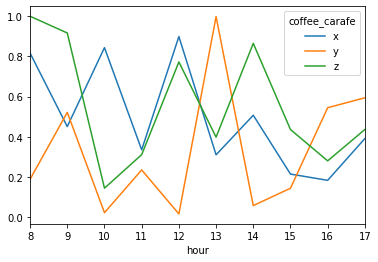

In [23]:
coffee_levels_pivot = coffee_levels.pivot_table(values="coffee_amount", index="hour", columns="coffee_carafe")
coffee_levels_pivot.plot()

In [24]:
coffee_levels_pivot = coffee_levels.pivot_table(values="coffee_amount", index="hour", columns="coffee_carafe")
coffee_levels_pivot = coffee_levels_pivot.reset_index()
coffee_levels_pivot.columns.name = ""
coffee_levels_pivot.rename(columns={"x": "carafe_x", "y": "carafe_y", "z": "carafe_z"}, inplace=True)
coffee_levels_pivot

,hour,carafe_x,carafe_y,carafe_z
0,8,0.816164,0.189297,0.999264
1,9,0.451018,0.521502,0.915990
2,10,0.843279,0.023163,0.144928
3,11,0.335533,0.235529,0.311495
4,12,0.898291,0.017009,0.771947
5,13,0.310711,0.997464,0.398520
6,14,0.507288,0.058361,0.864464
7,15,0.215043,0.144644,0.436364
8,16,0.183891,0.544676,0.280621
9,17,0.391560,0.594126,0.436677


## 3. Cake Recipes

1. Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
2. Tidy the data as necessary.
3. Which recipe, on average, is the best? recipe b
4. Which oven temperature, on average, produces the best results? 275
5. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [25]:
cake_recipes = pd.read_csv("untidy-data/cake_recipes.csv")
cake_recipes

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [26]:
cake_recipes_melt = cake_recipes.melt(id_vars="recipe:position", var_name="temp")
cake_recipes_melt

,recipe:position,temp,value
0,a:bottom,225,61.738655
1,a:top,225,51.709751
2,b:bottom,225,57.095320
3,b:top,225,82.455004
4,c:bottom,225,96.470207
5,c:top,225,71.306308
6,d:bottom,225,52.799753
7,d:top,225,96.873178
8,a:bottom,250,53.912627
9,a:top,250,52.009735


In [27]:
recipe_and_position_df = cake_recipes_melt["recipe:position"].str.split(":", expand=True)
recipe_and_position_df.columns = ["recipe", "position"]
recipe_and_position_df

,recipe,position
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom
5,c,top
6,d,bottom
7,d,top
8,a,bottom
9,a,top


In [28]:
cake_recipes2 = pd.concat([cake_recipes_melt, recipe_and_position_df], axis=1)
cake_recipes2.drop(columns="recipe:position", inplace=True)
cake_recipes2.rename(columns={"value": "score"}, inplace=True)
cake_recipes2.head()

,temp,score,recipe,position
0,225,61.738655,a,bottom
1,225,51.709751,a,top
2,225,57.095320,b,bottom
3,225,82.455004,b,top
4,225,96.470207,c,bottom


In [29]:
# Which recipe, on average, is the best?
cake_recipes2.groupby("recipe").score.mean().sort_values(ascending=False).nlargest(1)

recipe
b    76.736074
Name: score, dtype: float64

In [30]:
# Which oven temperature, on average, produces the best results?
cake_recipes2.groupby("temp").score.mean().sort_values(ascending=False).nlargest(1)

temp
275    74.886754
Name: score, dtype: float64

In [31]:
# Which combination of recipe, rack position, and temperature
# gives the best result?
cake_recipes2.groupby(["recipe", "position", "temp"]).score.mean().sort_values(ascending=False).nlargest(1)

recipe  position  temp
b       bottom    300     99.248541
Name: score, dtype: float64